In [3]:
# conda install -c conda-forge QuantLib-Python
import QuantLib as ql 

# 날짜 및 스케쥴만들기

### Date object와 Period method

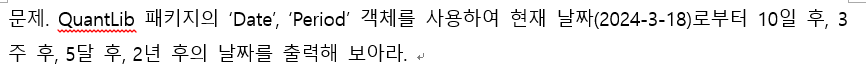

In [1]:
# conda install -c conda-forge QuantLib-Python

from QuantLib import Date
import datetime

# 현재 날짜 설정 방법 1 (datetime 이용)
current_date = datetime.date.today()

# QuantLib의 Date 객체로 변환
ql_current_date = Date(current_date.day, 
                       current_date.month, 
                       current_date.year)
print(ql_current_date)

September 9th, 2025


In [2]:
import QuantLib as ql
# 현재 날짜 설정 방법 2 (QuantLib이용)
ql_current_date=ql.Date.todaysDate()
print(ql_current_date)

September 9th, 2025


In [3]:
import QuantLib as ql 
# Date object 사용법 Date(날짜, 월, 년도)

date=ql.Date(18,3,2024)
print(date)

March 18th, 2024


In [4]:
print(date+ql.Period(1,ql.Weeks))

March 25th, 2024


In [14]:
date > Date(1,2,2021)

True

In [8]:
from QuantLib import Period, Weeks, Months, Years
# Period module 이용
# Period는 단순 날짜 계산만 한다. 즉, 영업일 고려 없음
date=ql.Date(9,9,2025)
print('Add 10 days:',date+10)
print('Add 3 weeks:',date+Period(3,Weeks))
print('Add 5 months:',date+Period(5,Months))
print('Add 2 years: ',date+Period(2,Years))

Add 10 days: September 19th, 2025
Add 3 weeks: September 30th, 2025
Add 5 months: February 9th, 2026
Add 2 years:  September 9th, 2027


In [9]:
# 2년 후의 년도, 월, 일을 리턴하려면 아래와 같이 하면 된다
date_2years=date+Period(2,Years)
print('2년 후의 년도: ',date_2years.year())
print('2년 후의 월: ',date_2years.month())
print('2년 후의 일: ',date_2years.dayOfMonth())

2년 후의 년도:  2027
2년 후의 월:  9
2년 후의 일:  9


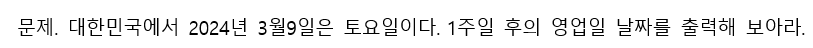

In [61]:
# us_cal=ql.UnitedStates()
# it_cal=ql.Italy()
# kr_cal=ql.SouthKorea()

In [10]:
import QuantLib as ql
# 2년 후의 대한민국 영업일 기준 날짜
kr_cal=ql.SouthKorea() # 대한민국 캘린더 설정
date=ql.Date(9,9,2025) 
period=ql.Period(1, Weeks) # 1주일 시간간격 설정
# ql.Preceding으로 지정하지 않으면 직전 영업일로 이동
# ql.Following (직후 영업일 출력, 디폴트값)
kr_date_preceding=kr_cal.advance(date,period,ql.Preceding)
kr_date_following=kr_cal.advance(date,period)
print('1주일후 직전 영업일 날짜:',kr_date_preceding)
print('1주일후 직후 영업일 날짜:',kr_date_following)

1주일후 직전 영업일 날짜: September 16th, 2025
1주일후 직후 영업일 날짜: September 16th, 2025


In [11]:
date=ql.Date(9,9,2025) 
period=ql.Period(1, ql.Months) 
kr_date_following=kr_cal.advance(date,period,ql.Following)
# 계약 날짜가 비영업일로 이동될 때 해당 월을 넘어가는 경우, 
# 대신 이전 영업일로 날짜가 조정됨 
# 즉, ql.ModifiedFollowing은 월을 넘기지 않는 범위 내에서 
# 다음 영업일로 날짜를 이동시킵니다.
kr_date_Mfollowing=kr_cal.advance(date,period,ql.ModifiedFollowing)
print('1달후 영업일 날짜:',kr_date_following)
print('1달후 영업일 날짜:',kr_date_Mfollowing)

1달후 영업일 날짜: October 10th, 2025
1달후 영업일 날짜: October 10th, 2025


In [12]:
# 영업일수 계산
#us_biz_days=us_cal.businessDaysBetween(date,Date(30,12,2022))
kr_biz_days=kr_cal.businessDaysBetween(date,Date(30,12,2025))
#it_biz_days=it_cal.businessDaysBetween(date,Date(30,12,2022))
#us_biz_days,kr_biz_days,it_biz_days
kr_biz_days

74

In [14]:
kr_cal.businessDaysBetween(Date(1,10,2025),Date(13,10,2025))

3

In [16]:
# 대한민국에서 주어진 날짜의 영업일 수 계산
date=Date(1,10,2025)
T_date=Date(10,10,2025)
kr_biz_days=kr_cal.businessDaysBetween(date,T_date)
print(date, '에서 ', T_date, '까지의 영업일수: ', kr_biz_days)

October 1st, 2025 에서  October 10th, 2025 까지의 영업일수:  2


In [17]:
# 주의할 점
today = ql.Date(2,10,2025)
# 날짜 객체로 생성
kr_cal=ql.SouthKorea()

print('현재 날짜:',today)
dD=ql.Period(1,ql.Days)
D1=today+dD
print('하루 후 날짜:',D1)
D2=kr_cal.advance(today,dD)
print('캘린더 상 하루 후 날짜:',D2)

현재 날짜: October 2nd, 2025
하루 후 날짜: October 3rd, 2025
캘린더 상 하루 후 날짜: October 10th, 2025


In [20]:
# 한 달 후 날짜
dD=ql.Period(1,ql.Months)
D1=today+dD
print('1개월 후 날짜:',D1)
D2=kr_cal.advance(today,dD)
print('캘린더 상 1개월 후 날짜:',D2)

1개월 후 날짜: April 29th, 2024
캘린더 상 1개월 후 날짜: April 29th, 2024


In [21]:
# 한 달 후 날짜
dD=ql.Period(30,ql.Days)
D1=today+dD
print('1개월 후 날짜:',D1)
D2=kr_cal.advance(today,dD)
print('캘린더 상 1개월 후 날짜:',D2)

1개월 후 날짜: April 28th, 2024
캘린더 상 1개월 후 날짜: May 16th, 2024


In [27]:
# 1년 후 날짜
dD=ql.Period(1,ql.Years)
D1=today+dD
print('1년 후 날짜:',D1)
D2=kr_cal.advance(today,dD)
print('캘린더 상 1년 후 날짜:',D2)

1년 후 날짜: March 29th, 2025
캘린더 상 1년 후 날짜: March 31st, 2025


In [28]:
# 365일 후 날짜
dD=ql.Period(365,ql.Days)
D1=today+dD
print('365일 후 날짜:',D1)
D2=kr_cal.advance(today,dD)
print('캘린더 상 365일 후 날짜:',D2)

365일 후 날짜: March 29th, 2025
캘린더 상 365일 후 날짜: September 24th, 2025


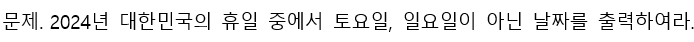

In [70]:
t1=ql.Date(1,3,2024)
t2=ql.Date(30,4,2024)
kr_cal.holidayList(t1,t2)

(Date(1,3,2024), Date(10,4,2024))

In [34]:
t1=ql.Date(1,1,2024)
t2=ql.Date(31,12,2024)
kr_cal.holidayList(t1,t2)

(Date(1,1,2024),
 Date(9,2,2024),
 Date(12,2,2024),
 Date(1,3,2024),
 Date(10,4,2024),
 Date(1,5,2024),
 Date(6,5,2024),
 Date(15,5,2024),
 Date(6,6,2024),
 Date(15,8,2024),
 Date(16,9,2024),
 Date(17,9,2024),
 Date(18,9,2024),
 Date(3,10,2024),
 Date(9,10,2024),
 Date(25,12,2024),
 Date(31,12,2024))

In [35]:
len(kr_cal.holidayList(t1,t2))

17

In [29]:
Date(15,8,2024).dayOfMonth()

2024

In [32]:
import datetime
datetime.date(2024, 8, 15).strftime('%A')

'Thursday'

In [33]:
# Quantlib 날짜를 입력값으로 받아서 무슨 요일인지 출력해 주는 함수
def ql_weekday(date):
    import datetime
    # date는 quantlib 날짜 객체 입력값
    y=date.year()
    m=date.month()
    d=date.dayOfMonth()
    return datetime.date(y,m,d).strftime('%A')

In [35]:
ql_weekday(Date(26,6,2024))

'Wednesday'

In [38]:
import QuantLib as ql

# 한국 달력 생성
kr_cal = ql.SouthKorea()

# 2020년부터 2030년까지의 날짜 설정
start_date = ql.Date(1, 1, 2020)
end_date = ql.Date(31, 12, 2030)

# 휴일 개수 리턴
Ncal=len(kr_cal.holidayList(start_date,end_date))

# 토요일과 일요일이 아닌 휴일 출력
non_weekend_holidays = [date for date in kr_cal.holidayList(start_date, end_date) 
                        if date.weekday() not in [7, 1]]

print("2020년부터 2030년까지의 휴일 개수:",Ncal)
print("2020년부터 2030년까지의 휴일 개수 중 주말 제외:",len(non_weekend_holidays))

2020년부터 2030년까지의 휴일 개수: 167
2020년부터 2030년까지의 휴일 개수 중 주말 제외: 167


In [36]:
len(non_weekend_holidays)

17

In [40]:
t1=ql.Date(1,3,2024)
t2=ql.Date(30,4,2024)
kr_cal.businessDaysBetween(t1,t2)

40

In [41]:
# 임시휴일을 추가해 보자
kr_cal.addHoliday(Date(11,4,2024))
kr_cal.businessDaysBetween(t1,t2)

39

In [42]:
# 특정 휴일 삭제
kr_cal.removeHoliday(Date(11,4,2024))
kr_cal.businessDaysBetween(t1,t2)

40

### 2026년 1월1일부터 12월31일까지의 일본, 미국, 대한민국의 영업일 수를 각각 구하고, 3국의 휴일 정보를 합하여 영업일 수를 다시 계산해 보아라. 

In [19]:
import QuantLib as ql 

# 캘린더 정보 읽어오기
jpn_cal=ql.Japan()
kr_cal=ql.SouthKorea()
# 미국은 NYSE,SOFR 등 기초자산에 따라 
# 추가 매개변수 지정 필요
us_cal=ql.UnitedStates(ql.UnitedStates.SOFR)

In [20]:
# 각 나라의 거래 휴일을 결합시켜보자
D1=ql.Date(1,1,2026)
D2=ql.Date(31,12,2026)
J_cal=ql.JointCalendar(jpn_cal, us_cal, kr_cal)

print('일본의 영업일수:{0}'.format(jpn_cal.businessDaysBetween(D1,D2)))
print('미국의 영업일수:{0}'.format(us_cal.businessDaysBetween(D1,D2)))
print('대한민국의 영업일수:{0}'.format(kr_cal.businessDaysBetween(D1,D2)))
print('3국의 결합 영업일수:{0}'.format(J_cal.businessDaysBetween(D1,D2)))

일본의 영업일수:242
미국의 영업일수:248
대한민국의 영업일수:246
3국의 결합 영업일수:223


### ELS 스텝다운 상품은 보통 3년만기 6개월 마다 조기상환 시점이 존재한다. 2025년 10월1일 발행하는 상품의 6개월 조기상환일을 자동으로 생성하여 보아라. 

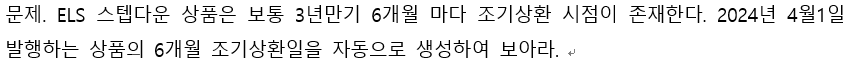

In [21]:
#2025년 10월 1일부터 3년 6개월 스텝다운 날짜 생성하기
from QuantLib import Date, Period, SouthKorea, Schedule
from QuantLib import Following, DateGeneration, Months

effective_date=Date(1,10,2025) # 유효시작날짜
termination_date=Date(1,10,2028) # 만기날짜
tenor=Period(6,Months) # 6개월마다
calendar=SouthKorea() # 대한민국 달력사용
business_convention=Following # 휴일과 겹치면 다음 영업일 
termination_business_convention=Following # 만기날짜가 휴일이면 다음 영업일
# DateGeneration.forward면 시작날짜부터 tenor마다 뒤로 가면서 날짜를 찾는 것이고
# backward면 만기날짜부터 tenor마다 앞으로 오면서 날짜를 찾는 것임
date_generation=DateGeneration.Forward 
end_of_month=False # True면 날짜의 달의 마지막 날짜로 조정

ss=Schedule(effective_date,
            termination_date,
            tenor,
            calendar,
            business_convention,
            termination_business_convention,
            date_generation,
            end_of_month)

In [22]:
for i,date in enumerate(ss):
    # i는 순서 (0부터 시작)
    # date는 ss에 들어 있는 날짜
    print(i+1,date)

1 October 1st, 2025
2 April 1st, 2026
3 October 1st, 2026
4 April 1st, 2027
5 October 1st, 2027
6 April 3rd, 2028
7 October 6th, 2028


In [23]:
date_generation=DateGeneration.Backward 
end_of_month=True
ss=Schedule(effective_date,
            termination_date,
            tenor,
            calendar,
            business_convention,
            termination_business_convention,
            date_generation,
            end_of_month)

In [24]:
for i,date in enumerate(ss):
    # i는 순서 (0부터 시작)
    # d는 ss에 들어 있는 날짜
    print(i+1,date)

1 October 1st, 2025
2 April 1st, 2026
3 October 1st, 2026
4 April 1st, 2027
5 October 1st, 2027
6 April 3rd, 2028
7 October 6th, 2028


## 날짜수 연산

In [25]:
import QuantLib as ql

# Actual/360 날짜 계산 방법을 사용하여 날짜 간의 차이 계산
start_date = ql.Date(1, 1, 2024)
end_date = ql.Date(31, 12, 2025)
actual360 = ql.Actual360()

days_actual360 = actual360.dayCount(start_date, end_date)
print("Actual/360로 계산된 날짜 간의 차이:", days_actual360)

# 30/360 날짜 계산 방법을 사용하여 날짜 간의 차이 계산
thirty360 = ql.Thirty360(ql.Thirty360.European)

days_thirty360 = thirty360.dayCount(start_date, end_date)
print("30/360으로 계산된 날짜 간의 차이:", days_thirty360)

Actual/360로 계산된 날짜 간의 차이: 730
30/360으로 계산된 날짜 간의 차이: 719


In [60]:
# Actual/Actual 날짜 계산 방법을 사용하여 날짜 간의 차이 계산
actual_actual = ql.ActualActual(ql.ActualActual.ISMA)

days_actual_actual = actual_actual.dayCount(start_date, end_date)
print("Actual/Actual로 계산된 날짜 간의 차이:", days_actual_actual)

Actual/Actual로 계산된 날짜 간의 차이: 730


In [26]:
# 금리 계산
annual_interest_rate = 0.20

start_date = ql.Date(1, 1, 2024)
end_date = ql.Date(15, 7, 2025)

# ActualActual을 사용하여 연간 이자 계산
actual_actual_day_counter =ql.ActualActual(ql.ActualActual.ISMA)
actual_actual_interest = annual_interest_rate * actual_actual_day_counter.yearFraction(start_date, end_date)
print("ActualActual을 사용한 연간 이자:", actual_actual_interest)

# Actual/365를 사용하여 연간 이자 계산
actual_365_day_counter = ql.Actual365Fixed()
actual_365_interest = annual_interest_rate * actual_365_day_counter.yearFraction(start_date, end_date)
print("Actual/365을 사용한 연간 이자:", actual_365_interest)

# Thirty360을 사용하여 연간 이자 계산
thirty360_day_counter = ql.Thirty360(ql.Thirty360.BondBasis)
thirty360_interest = annual_interest_rate * thirty360_day_counter.yearFraction(start_date, end_date)
print("Thirty360을 사용한 연간 이자:", thirty360_interest)

# Actual/360을 사용하여 연간 이자 계산
actual_360_day_counter = ql.Actual360()
actual_360_interest = annual_interest_rate * actual_360_day_counter.yearFraction(start_date, end_date)
print("Actual/360을 사용한 연간 이자:", actual_360_interest)

ActualActual을 사용한 연간 이자: 0.30000000000000004
Actual/365을 사용한 연간 이자: 0.30739726027397263
Thirty360을 사용한 연간 이자: 0.3077777777777778
Actual/360을 사용한 연간 이자: 0.3116666666666667


# 블랙숄즈 공식 사용하기

In [27]:
import QuantLib as ql 

today=ql.Date.todaysDate()
ql.Settings.instance().evaluationDate=today # 프라이싱 날짜 픽싱

In [28]:
T_period=ql.Period(3, ql.Months) # 만기 tenor
kr_cal=ql.SouthKorea()
T=kr_cal.advance(today,T_period) # 만기날짜 확정
u=ql.SimpleQuote(100.0) # 기초자산 현재가 설정
r=ql.SimpleQuote(0.04) # riskfree rate
sig=ql.SimpleQuote(0.2) # 연변동성 설정

In [29]:
# 이자율과 변동성 커브로 설정
rf_curve=ql.FlatForward(today,ql.QuoteHandle(r),ql.ActualActual(ql.ActualActual.ISMA))
vol_curve=ql.BlackConstantVol(today,kr_cal,ql.QuoteHandle(sig),ql.ActualActual(ql.ActualActual.ISMA))

In [30]:
# 커브 핸들로 확장
rf_curve_handle=ql.YieldTermStructureHandle(rf_curve)
vol_curve_handle=ql.BlackVolTermStructureHandle(vol_curve)

In [31]:
# 옵션종류 세팅 및 평가  process 설정
K=ql.PlainVanillaPayoff(ql.Option.Call,100) # 콜옵션, 행사가격 100
option=ql.EuropeanOption(K,ql.EuropeanExercise(T)) # 만기에 유럽형 행사
process=ql.BlackScholesProcess(ql.QuoteHandle(u),
                               rf_curve_handle,
                               vol_curve_handle)
# Analytic Formula로 평가엔진 결합
engine=ql.AnalyticEuropeanEngine(process)
option.setPricingEngine(engine)

In [32]:
# 가격과 Greeks
print('옵션가격:',option.NPV())
print('델타:',option.delta())
print('감마:',option.gamma())
print('1% 베가:',option.vega()/100)
print('1bp 르호:',option.rho()/10000)
print('1Day 세타:',option.theta()/365)

옵션가격: 4.485236409022083
델타: 0.5596176923702426
감마: 0.039447933090788895
1% 베가: 0.19723966545394447
1bp 르호: 0.0012869133207000544
1Day 세타: -0.027256569674733822


In [56]:
# Automatic Re-Pricing
u.setValue(105)
print('옵션가격:',option.NPV())
print('델타:',option.delta())
print('감마:',option.gamma())
print('1% 베가:',option.vega()/100)
print('1bp 르호:',option.rho()/10000)
print('1Day 세타:',option.theta()/365)

옵션가격: 7.747683875672607
델타: 0.7382311454904811
감마: 0.030999845988993815
1% 베가: 0.1708866510143286
1bp 르호: 0.0017441646600206968
1Day 세타: -0.026372957524948552


In [57]:
# 함수 형태로 작성
def BSformula_Q(S,K,r,sig,T):
    # T: 잔연만기 (in years)
    import QuantLib as ql 
    import datetime
    
    today=ql.Date.todaysDate()
    ql.Settings.instance().evaluationDate=today # 프라이싱 날짜 픽싱
    T_period=ql.Period(round(T*12), ql.Months) # 만기 tenor
    kr_cal=ql.SouthKorea()
    T=kr_cal.advance(today,T_period) # 만기날짜 확정
    u=ql.SimpleQuote(S) # 기초자산 현재가 설정
    r=ql.SimpleQuote(r) # riskfree rate
    sig=ql.SimpleQuote(sig) # 연변동성 설정

    rf_curve=ql.FlatForward(today,ql.QuoteHandle(r),ql.ActualActual(ql.ActualActual.ISMA))
    vol_curve=ql.BlackConstantVol(today,kr_cal,ql.QuoteHandle(sig),ql.ActualActual(ql.ActualActual.ISMA))

    rf_curve_handle=ql.YieldTermStructureHandle(rf_curve)
    vol_curve_handle=ql.BlackVolTermStructureHandle(vol_curve)
    
    # 옵션종류 세팅 및 평가  process 설정
    K=ql.PlainVanillaPayoff(ql.Option.Call,K) # 콜옵션, 행사가격 100
    option=ql.EuropeanOption(K,ql.EuropeanExercise(T)) # 만기에 유럽형 행사
    process=ql.BlackScholesProcess(ql.QuoteHandle(u),
                                   rf_curve_handle,
                                   vol_curve_handle)
    # Analytic Formula로 평가엔진 결합
    engine=ql.AnalyticEuropeanEngine(process)
    option.setPricingEngine(engine)
    return option.NPV()

In [58]:
BSformula_Q(100,100,0.04,0.2,0.25)

4.485236409022083

Text(0, 0.5, 'option value')

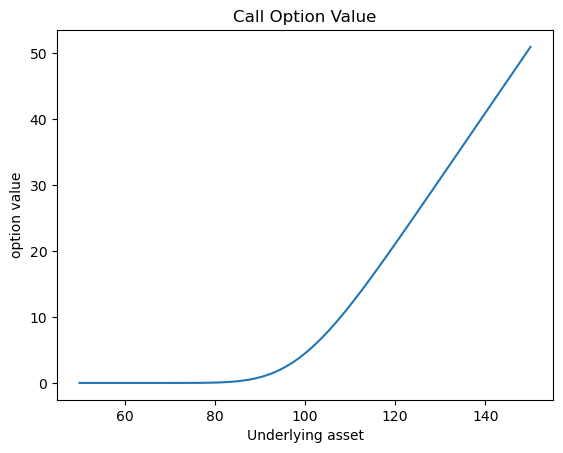

In [59]:
# 주가 변화에 따르는 옵션 가치 변화 그래프
import numpy as np
import matplotlib.pyplot as plt 

xs=np.linspace(50,150,100)
ys=[]

for s in xs:
    ys.append(BSformula_Q(s,100,0.04,0.2,0.25))
    
plt.plot(xs,np.array(ys))
plt.title('Call Option Value')
plt.xlabel('Underlying asset')
plt.ylabel('option value')

Text(0, 0.5, 'option value')

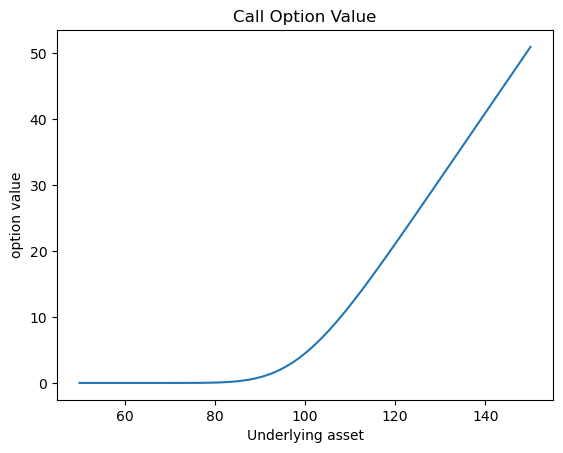

In [60]:
# 주가 변화에 따르는 옵션 가치 변화 그래프
import cupy as cp
import matplotlib.pyplot as plt 

xs=cp.linspace(50,150,100)
ys=cp.zeros(len(xs))
for i,c in enumerate(xs):
    u.setValue(float(cp.asnumpy(c)))
    ys[i]=option.NPV()
plt.plot(cp.asnumpy(xs),cp.asnumpy(ys))
plt.title('Call Option Value')
plt.xlabel('Underlying asset')
plt.ylabel('option value')

# Knock In Barrier Option

In [61]:
import QuantLib as ql 
import datetime

today=datetime.date.today() # 현재 시스템 날짜
# 날짜 객체로 생성
today=ql.Date(today.day, today.month, today.year)
ql.Settings.instance().evaluationDate=today # 프라이싱 날짜 픽싱

In [62]:
T_period=ql.Period(3, ql.Months) # 만기 tenor
kr_cal=ql.SouthKorea()
T=kr_cal.advance(today,T_period,ql.Following) # 만기날짜 확정
u=ql.SimpleQuote(100.0) # 기초자산 현재가 설정
r=ql.SimpleQuote(0.01) # riskfree rate
sig=ql.SimpleQuote(0.2) # 연변동성 설정

In [63]:
# 이자율과 변동성 커브로 설정
rf_curve=ql.FlatForward(today,ql.QuoteHandle(r),ql.ActualActual(ql.ActualActual.ISMA))
vol_curve=ql.BlackConstantVol(today,kr_cal,ql.QuoteHandle(sig),ql.ActualActual(ql.ActualActual.ISMA))

In [64]:
# 커브 핸들로 확장
rf_curve_handle=ql.YieldTermStructureHandle(rf_curve)
vol_curve_handle=ql.BlackVolTermStructureHandle(vol_curve)

In [65]:
# 옵션종류 세팅 및 평가  process 설정
Barrier, rebate = 120.0, 0.0
option=ql.BarrierOption(ql.Barrier.UpIn,Barrier,rebate,
                        ql.PlainVanillaPayoff(ql.Option.Call,100),
                        ql.EuropeanExercise(T))

process=ql.BlackScholesProcess(ql.QuoteHandle(u),
                               rf_curve_handle,
                               vol_curve_handle)
# Analytic Formula로 평가엔진 결합
engine=ql.AnalyticBarrierEngine(process)
option.setPricingEngine(engine)

In [66]:
option.NPV()

1.3068309371231932

In [67]:
option.delta() # 민감도를 구할 수 없는 공식도 있음

RuntimeError: delta not provided

In [86]:
# 민감도를 구하기 위해 함수로 만든다.
def UpInCallRebate_Q(tday,matday,S,K, r,sig,Barrier,rebate):
    # tday,matday: '년도-월-일'의 형식으로 입력할 것
    # Tm: 잔여만기 (in Months)
    
    import QuantLib as ql 
    from datetime import datetime
  
    # 문자열을 datetime 객체로 변환
    d_obj = datetime.strptime(tday, '%Y-%m-%d')
    d_obj2 = datetime.strptime(matday, '%Y-%m-%d')
    # Date 객체 생성
    today = ql.Date(d_obj.day, d_obj.month, d_obj.year)
    mat_day = ql.Date(d_obj2.day, d_obj2.month, d_obj2.year)
    ql.Settings.instance().evaluationDate=today # 프라이싱 날짜 픽싱
    
    u=ql.SimpleQuote(S) # 기초자산 현재가 설정
    r=ql.SimpleQuote(r) # riskfree rate
    sig=ql.SimpleQuote(sig) # 연변동성 설정
    # 이자율과 변동성 커브로 설정
    kr_cal=ql.SouthKorea()
    rf_curve=ql.FlatForward(today,ql.QuoteHandle(r),ql.ActualActual(ql.ActualActual.ISMA))
    vol_curve=ql.BlackConstantVol(today,kr_cal,ql.QuoteHandle(sig),ql.ActualActual(ql.ActualActual.ISMA))
    # 커브 핸들로 확장
    rf_curve_handle=ql.YieldTermStructureHandle(rf_curve)
    vol_curve_handle=ql.BlackVolTermStructureHandle(vol_curve)

    
    # 옵션종류 세팅 및 평가  process 설정
    Barrier, rebate = 120.0, 0
    option=ql.BarrierOption(ql.Barrier.UpIn,Barrier,rebate,
                            ql.PlainVanillaPayoff(ql.Option.Call,100),
                            ql.EuropeanExercise(mat_day))
    
    process=ql.BlackScholesProcess(ql.QuoteHandle(u),
                                   rf_curve_handle,
                                   vol_curve_handle)
    # Analytic Formula로 평가엔진 결합
    engine=ql.AnalyticBarrierEngine(process)
    option.setPricingEngine(engine)
    price=option.NPV()
    return price

In [87]:
def Greeks(tday,matday,S,K, r,sig,Barrier,rebate):
    from datetime import datetime,timedelta
    # 문자열을 datetime 객체로 변환
    d_obj = datetime.strptime(tday, '%Y-%m-%d')   
    # 하루를 더하여 새로운 날짜 생성
    new_datetime_obj = d_obj + timedelta(days=1)    
    # 새로운 날짜를 문자열로 변환
    t2day = new_datetime_obj.strftime('%Y-%m-%d')
    
    dp=S*0.01
    P0=UpInCallRebate_Q(tday,matday,S,K, r,sig,Barrier,rebate)
    Pup=UpInCallRebate_Q(tday,matday,S+dp,K, r,sig,Barrier,rebate)
    Pdn=UpInCallRebate_Q(tday,matday,S-dp,K, r,sig,Barrier,rebate)
    delta= (Pup-Pdn)/(2*dp)
    gamma=(Pup-2*P0+Pdn)/(dp*dp)
    Pv=UpInCallRebate_Q(tday,matday,S,K, r,sig+0.01,Barrier,rebate)
    vega=Pv-P0
    Pr=UpInCallRebate_Q(tday,matday,S,K, r+0.0001,sig,Barrier,rebate)
    rho=Pr-P0
    Pt=UpInCallRebate_Q(t2day,matday,S,K, r,sig,Barrier,rebate)
    theta=Pt-P0
    print('가격:',P0)
    print('델타:',delta)
    print('감마:',gamma)
    print('1% 베가:',vega)
    print('1bp 르호:',rho)
    print('1Day 세타:',theta)

In [88]:
UpInCallRebate_Q('2024-03-29','2024-6-30',100,100,0.01,0.2,120,0)

1.3068309371231932

In [89]:
Greeks('2024-4-5','2024-7-5',100,100,0.01,0.2,120,0)

가격: 1.3068309371231932
델타: 0.29439891289142295
감마: 0.051562809151527
1% 베가: 0.26611841123679425
1bp 르호: 0.000623680054298692
1Day 세타: 0.0


In [90]:
from datetime import datetime,timedelta
# 문자열을 datetime 객체로 변환
d_obj = datetime.strptime('2024-03-29', '%Y-%m-%d')   
# 하루를 더하여 새로운 날짜 생성
new_datetime_obj = d_obj + timedelta(days=1)    
# 새로운 날짜를 문자열로 변환
t2day = new_datetime_obj.strftime('%Y-%m-%d')

In [91]:
t2day

'2024-03-30'

In [92]:
UpInCallRebate_Q('2024-03-29','2024-6-30',100,100,0.01,0.2,120,0)

1.3068309371231932

In [93]:
UpInCallRebate_Q('2024-04-12','2024-6-30',100,100,0.01,0.2,120,0)

1.3068309371231932